In [1]:
from qiskit import *

nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

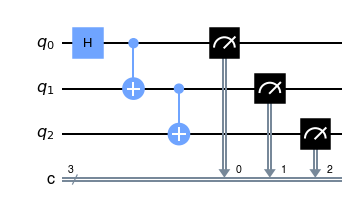

In [2]:
circuit.draw('mpl')

In [3]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots = 1024).result()

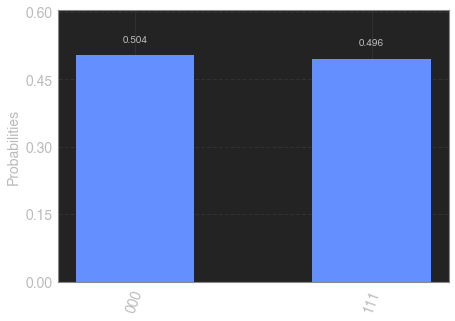

In [4]:
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = provider.get_backend('ibmq_lima')
result = execute(circuit, backend = device, shots = 1024).result()

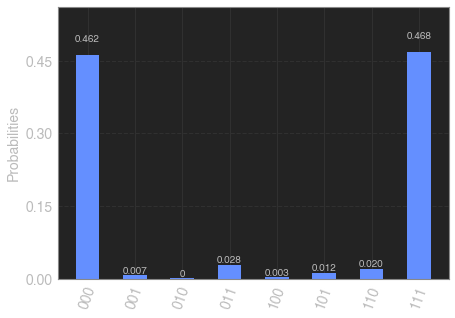

In [7]:
plot_histogram(result.get_counts(circuit))

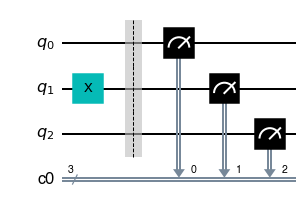

In [9]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal

cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')
cal_circuits[2].draw('mpl')

In [10]:
len(cal_circuits)

8

In [12]:
cal_job = execute(cal_circuits, backend = device, shots = 1024, 
                  optimization_level = 0)
cal_results = cal_job.result()

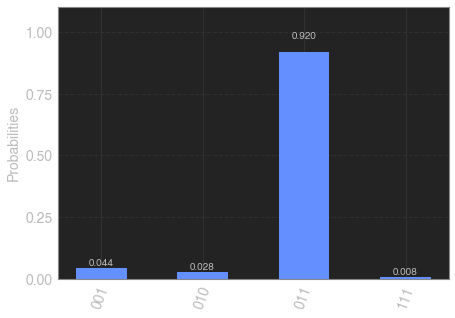

In [20]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [22]:
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

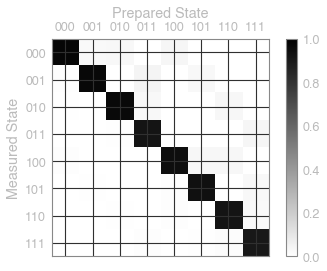

In [23]:
meas_fitter.plot_calibration()